In [52]:
library(dplyr)
library(scatterplot3d)
library(cluster)

In [53]:
setwd("D:/Lancaster University/Modules/Statistical learning/coursework task-20180209") 
patient <- read.table("patient.dat", header = TRUE)
#View(patient)
dim(patient)#381  25
names(patient)

[1] 380  25

[1] "WORK2"    "HOBBY2"   "BREATH2"  "PAIN2"    "REST2"    "SLEEP2"  
 [7] "APPET2"   "NAUSEA2"  "VOMIT2"   "CONST2"   "DIARR2"   "TIRED2"  
[13] "PAINADL2" "CONCEN2"  "TENSE2"   "WORRY2"   "IRRIT2"   "DEPRES2" 
[19] "REMEM2"   "FAMILY2"  "SOCIAL2"  "FINANC2"  "GENDER"   "AGE"     
[25] "LIVEWITH"

In [54]:
patient_clus<- select(patient, WORK2, HOBBY2, BREATH2, PAIN2, REST2, SLEEP2, APPET2, NAUSEA2, VOMIT2, CONST2, DIARR2, TIRED2, PAINADL2, CONCEN2, TENSE2, WORRY2, IRRIT2, DEPRES2, REMEM2, FAMILY2, SOCIAL2, FINANC2)
names(patient_clus)
patient_clus<- na.omit(patient_clus)
dim(patient_clus)#302 22  
head(patient_clus)

[1] "WORK2"    "HOBBY2"   "BREATH2"  "PAIN2"    "REST2"    "SLEEP2"  
 [7] "APPET2"   "NAUSEA2"  "VOMIT2"   "CONST2"   "DIARR2"   "TIRED2"  
[13] "PAINADL2" "CONCEN2"  "TENSE2"   "WORRY2"   "IRRIT2"   "DEPRES2" 
[19] "REMEM2"   "FAMILY2"  "SOCIAL2"  "FINANC2"

[1] 302  22

WORK2,HOBBY2,BREATH2,PAIN2,REST2,SLEEP2,APPET2,NAUSEA2,VOMIT2,CONST2,...,PAINADL2,CONCEN2,TENSE2,WORRY2,IRRIT2,DEPRES2,REMEM2,FAMILY2,SOCIAL2,FINANC2
3,3,2,3,3,2,1,1,1,1,...,2,3,1,1,2,1,1,3,2,3
4,4,4,4,4,4,1,2,2,2,...,3,3,3,3,3,3,3,2,3,3
4,4,4,2,4,2,1,1,1,1,...,2,3,2,2,2,2,3,3,4,1
4,3,3,3,3,4,2,1,1,1,...,4,4,4,4,4,4,4,3,3,2
3,3,1,3,3,4,2,2,1,1,...,2,3,3,2,3,3,3,3,3,1
2,2,2,2,3,1,2,1,1,3,...,1,1,1,2,1,2,2,3,2,1


In [56]:
#pam
out2<-pam(patient_clus,4)
out2




Medoids:
     ID WORK2 HOBBY2 BREATH2 PAIN2 REST2 SLEEP2 APPET2 NAUSEA2 VOMIT2 CONST2
135 113     3      3       2     1     3      2      1       1      1      1
215 175     4      4       2     4     4      3      2       3      3      3
353 281     2      2       1     2     2      1      1       1      1      1
360 286     1      1       1     1     1      1      1       1      1      1
    DIARR2 TIRED2 PAINADL2 CONCEN2 TENSE2 WORRY2 IRRIT2 DEPRES2 REMEM2 FAMILY2
135      1      3        1       2      2      2      2       2      2       2
215      1      4        4       2      3      4      3       4      2       4
353      1      2        1       1      2      2      2       2      1       2
360      1      1        1       1      1      1      1       1      1       1
    SOCIAL2 FINANC2
135       3       2
215       4       2
353       2       1
360       1       1
Clustering vector:
  1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18  20  21  22 
  1   2   1

In [57]:
out2$id.med


[1] 113 175 281 286

In [58]:
out2$isolation 


1  2  3  4 
no no no no 
Levels: no L L*

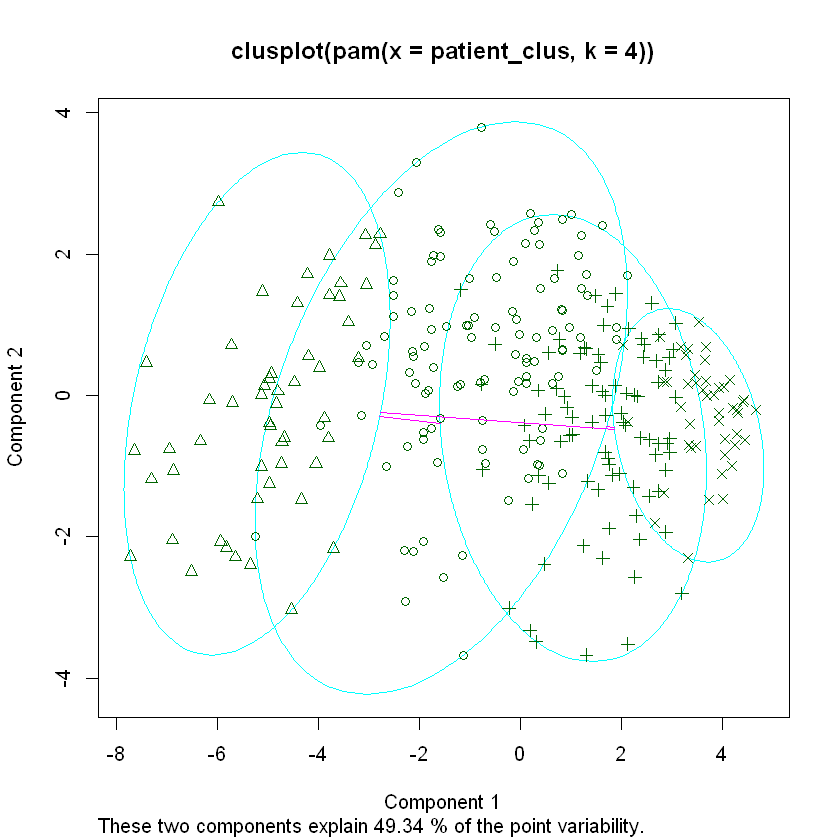

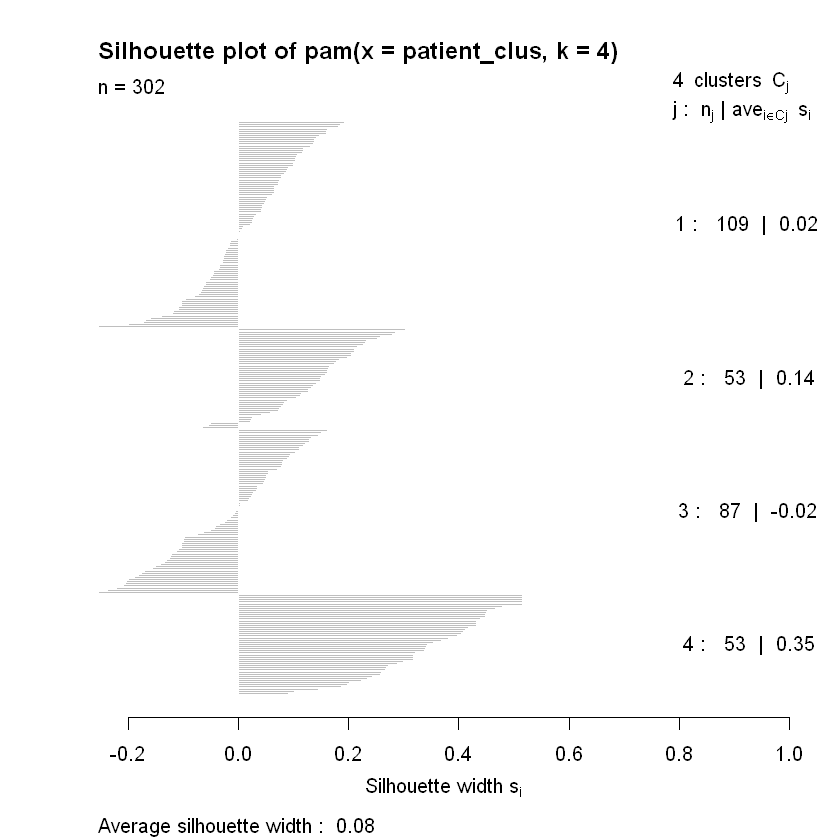

In [59]:
plot(out2)# as before produces a silhouette plot. 		

In [60]:
asw<-numeric(20)
for (k in 2:20)
       asw[k] <- pam(patient_clus, k) $ silinfo $ avg.width
k.best <- which.max(asw)
k.best#it is 2

[1] 2

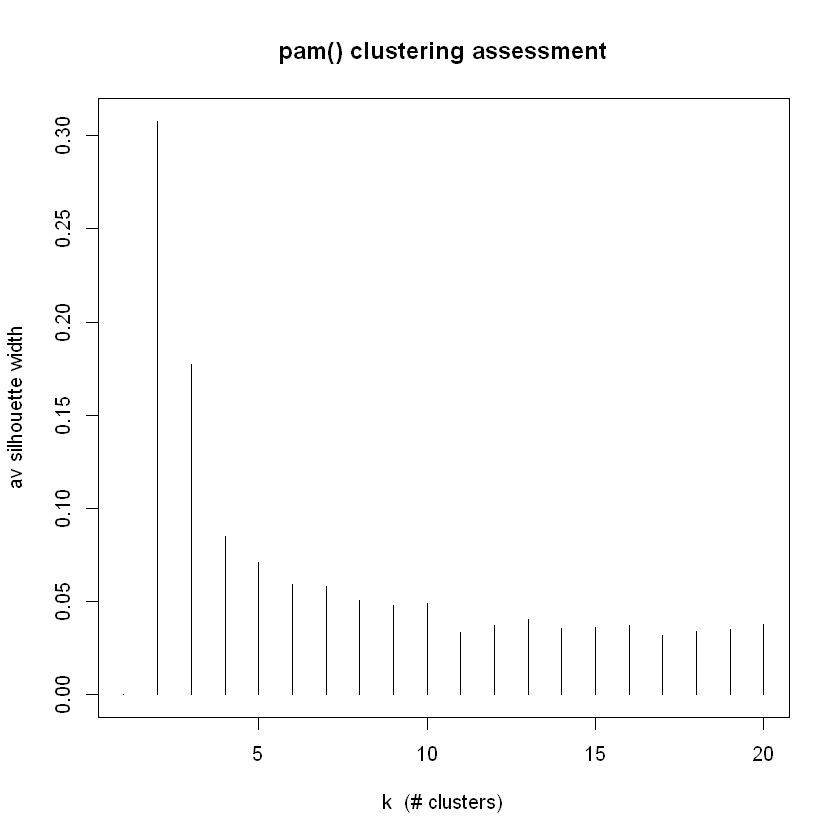

In [61]:
plot(1:20, asw, type= "h", 
main = "pam() clustering assessment",
xlab= "k  (# clusters)", 
ylab = "av silhouette width") #silhouette-optimal number of clusters:2

In [62]:
#I tried with 2

In [63]:
out3<-pam(patient_clus,2)
out3

Medoids:
     ID WORK2 HOBBY2 BREATH2 PAIN2 REST2 SLEEP2 APPET2 NAUSEA2 VOMIT2 CONST2
353 281     2      2       1     2     2      1      1       1      1      1
212 173     3      4       3     3     3      3      2       1      1      1
    DIARR2 TIRED2 PAINADL2 CONCEN2 TENSE2 WORRY2 IRRIT2 DEPRES2 REMEM2 FAMILY2
353      1      2        1       1      2      2      2       2      1       2
212      1      3        3       3      3      3      2       2      3       4
    SOCIAL2 FINANC2
353       2       1
212       4       2
Clustering vector:
  1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18  20  21  22 
  1   2   2   2   2   1   1   1   1   2   1   1   1   1   1   1   2   1   1   1 
 23  24  25  26  27  30  31  32  34  37  38  39  40  41  42  44  45  47  48  49 
  1   1   1   1   1   2   1   2   1   1   2   1   1   1   1   1   2   1   2   2 
 50  51  52  53  55  56  57  58  59  61  62  64  65  66  67  69  70  71  72  73 
  1   2   1   2   2   1   1   1   1   1

In [64]:
out3$id.med

[1] 281 173

In [65]:
out3$isolation


1  2 
no no 
Levels: no L L*

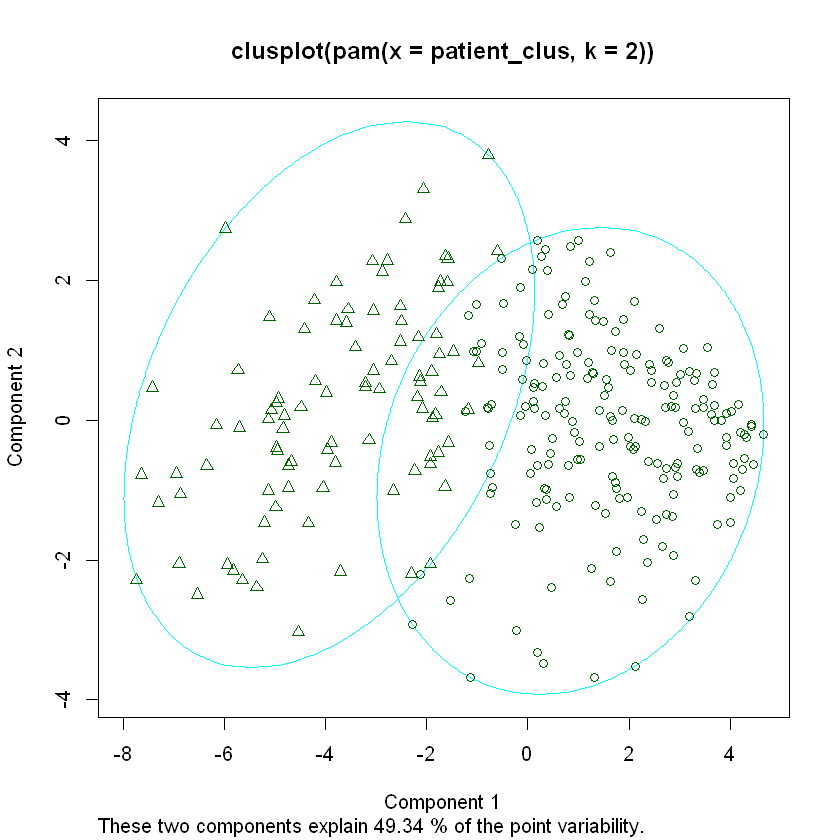

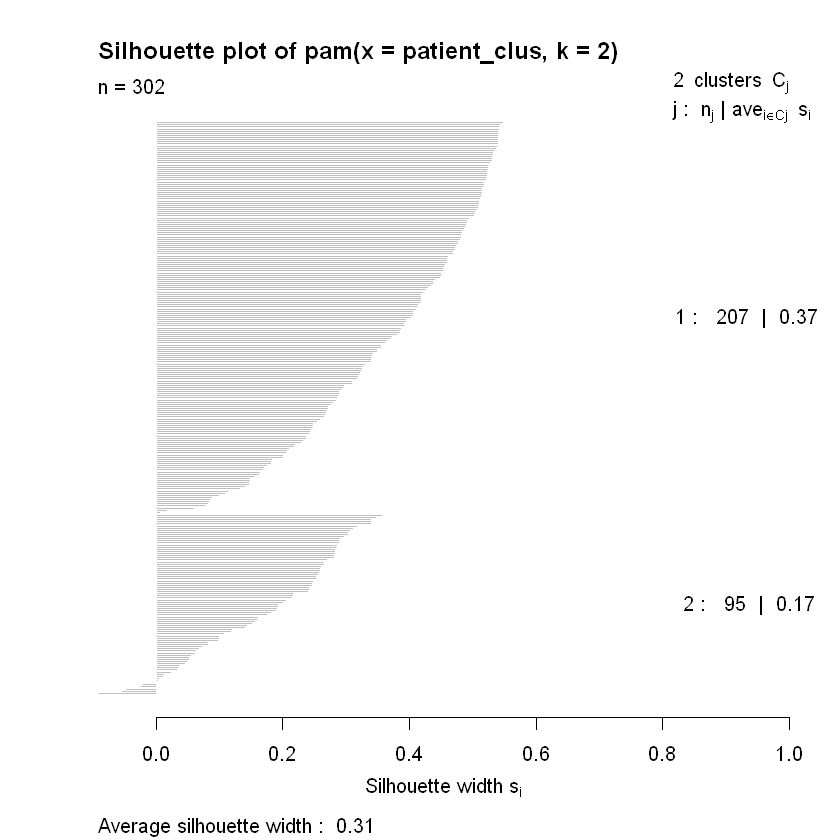

In [66]:
 plot(out3)# as before produces a silhouette plot. 		